# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [2]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [3]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

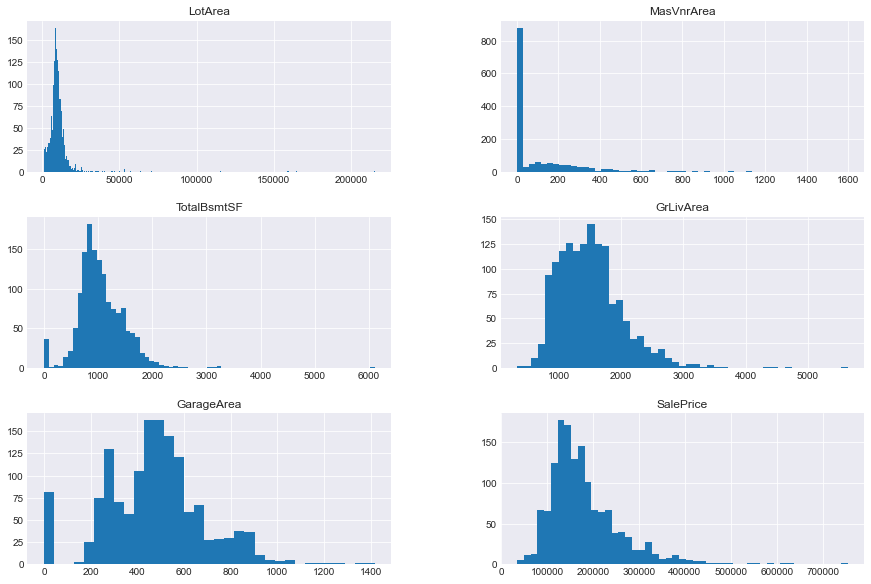

In [4]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = ames.drop("SalePrice", axis=1)
y = ames["SalePrice"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Mean Squared Error: 1598899456.9063275
R-squared: 0.7381634586506278
Coefficients:
LotArea: 0.24915816503674204
MasVnrArea: 58.048120176502465
TotalBsmtSF: 39.915749536096726
GrLivArea: 62.67526705229061
GarageArea: 96.00655405283564


In [9]:
# LotAREA: for each additional square foot of area, the price increases by $0.25
# MasVnrArea: for each additional square foot of area, the price increases by $58.05
# TotalBsmtSF: for each additional square foot of area, the price increases by $39.92
# GrLivArea: for each additional square foot of area, the price increases by $62.68
# GarageArea: for each additional square foot of area, the price increases by $96

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [10]:
sqft_to_sqm = 0.092903

coefficients_sqm = {
    'LotArea': model.coef_[0] / sqft_to_sqm,
    'MasVnrArea': model.coef_[1] / sqft_to_sqm,
    'TotalBsmtSF': model.coef_[2] / sqft_to_sqm,
    'GrLivArea': model.coef_[3] / sqft_to_sqm,
    'GarageArea': model.coef_[4] / sqft_to_sqm
}

print("Coefficients (in square meters):")
for feature, coef in coefficients_sqm.items():
    print(f"{feature}: {coef}")

Coefficients (in square meters):
LotArea: 2.68191732276398
MasVnrArea: 624.8250344607005
TotalBsmtSF: 429.64973721081907
GrLivArea: 674.6312503610283
GarageArea: 1033.4063921814757


In [11]:
# Your written answer here
# LotAREA: for each additional square meter of area, the price increases by $2.68
# MasVnrArea: for each additional square meter of area, the price increases by $624.83
# TotalBsmtSF: for each additional square meter of area, the price increases by $429.65
# GrLivArea: for each additional square meter of area, the price increases by $674.63
# GarageArea: for each additional square meter of area, the price increases by $1033.41

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=False)

X_centered = scaler.fit_transform(X)

X_train_centered, X_test_centered, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, random_state=42)

In [14]:
# Your code here - build a new model
model_centered = LinearRegression()

model_centered.fit(X_train_centered, y_train)

predictions_centered = model_centered.predict(X_test_centered)

print("Intercept (with centered data):", model_centered.intercept_)

Intercept (with centered data): 180231.9623813497


In [15]:
# centered data is 180231.96 - meaning that a home with average lot, masonry veneer, basement, and living, and garage area
# would cell for about $180,231.96

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [16]:
scaler = StandardScaler(with_mean=True, with_std=True)

X_standardized = scaler.fit_transform(X)

# split data1
X_train_standardized, X_test_standardized, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

model_standardized = LinearRegression()
model_standardized.fit(X_train_standardized, y_train)

predictions_standardized = model_standardized.predict(X_test_standardized)

standardized_coefficients = dict(zip(X.columns, model_standardized.coef_))

most_important_feature = max(standardized_coefficients, key=lambda x: abs(standardized_coefficients[x]))

print("Standardized Coefficients:")
for feature, coef in standardized_coefficients.items():
    print(f"{feature}: {coef}")

print("\nMost Important Feature:", most_important_feature)

Standardized Coefficients:
LotArea: 2488.1240991532513
MasVnrArea: 10506.932960094564
TotalBsmtSF: 17481.828808484093
GrLivArea: 32932.51430881188
GarageArea: 20548.53780241884

Most Important Feature: GrLivArea


In [19]:
# The Most Important feature is Ground Living Area.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!